# Data Science Pipe Line Tutorial
Jayden J. Youm <br>

## 1. Introduction
In this project, I want to see and analysis of the hate crime in the nation's biggest city; New York City. <br>

### 1-1 Background information
    In 2020 March, Covid virus attacked US. Since then, people in all over the world suffering and fighting with that disease.
    Because Covid-19 starts in the Wuhan, China, the virus also called Wuhan Virus or China Virus.
    Espeicially after former president Donald Trump kept publicly called it China Virus, there were many Asian-hate crime comitted.
    Actually, one of my korean friend living NYC once told me that a random guy spat on her face while she was waiting in line at the restaurant.
    called "go back to your country"

    Hate crime is not only toward Asian. There ware two prominent movements in Covid era.
    One is "Black lives matter", and the other is "Stop Hate Asian."
    "Black Lives Matter" movement started all around the US after George Floyd.
    Lots of people march for the black people and talking about hate crime.

    "Stop Hate Asian" movement has been flourished after gunshot in Atlanta, fighting for the literally asian hate.

    As an Asian living in the US, I want to see how actually hate crime toward asian increased during covid,
    and also want to see how hate crime toward black changed after "black lives matter" movement.
    since both movement's aim is pretty simmilar, "Stop hate Black people" and "Stop hate Asian people"

    before the beginning I assumed that the anti-asian crime is still increasing, but since it has been a while we started BLM movement,
    I made a hypothesis that the Hate crime toward black people decreased significantly start at George Floyd.

### 1-2 Libraries
    to start, we need to import some libraries for gathering data from the online. All the libraries are below
    I used pandas for organizing dataframe.
    matplotlib to visualize the data by drawing graphs.
    sklearn.linear_model to draw regression line so that I can predict with the given data.

In [1177]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 2. Data Collection
    to get the data, I download CSV file from the Data.gov website.
    Data is showing all the hate crime between Jan 2019 and March 2021 in New York City.
    I chose this data because NYC is the biggest city in the US and also very diverse, and the data is very recent
    so that this data can represent the current situation in general.

In [1178]:
df = pd.read_csv("NYPD_Hate_Crimes.csv")
df

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Other Motive Description,Arrest Date,Arrest Id
0,201900112220917,2019,3,03/07/2019,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN,NaN
1,201900112125917,2019,1,01/24/2019,1,PATROL BORO MAN SOUTH,NEW YORK,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-JEWISH,Religion/Religious Practice,NaN,NaN,NaN
2,202100112173517,2021,3,03/06/2021,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-HISPANIC,Ethnicity/National Origin/Ancestry,NaN,NaN,NaN
3,201900112442817,2019,6,06/08/2019,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MUSLIM,Religion/Religious Practice,NaN,06/08/2019,M19626067
4,201900112618217,2019,8,08/14/2019,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-WHITE,Race/Color,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,201912212568117,2019,10,10/26/2019,122,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-BLACK,Race/Color,NaN,NaN,NaN
828,201912212498017,2019,9,09/15/2019,122,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,NaN,NaN,NaN
829,201912212334717,2019,6,06/10/2019,122,PATROL BORO STATEN ISLAND,RICHMOND,FELONY,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF,CRIMINAL, UNCL 2ND",ANTI-JEWISH,Religion/Religious Practice,NaN,NaN,NaN
830,202012312240017,2020,8,08/06/2020,123,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-BLACK,Race/Color,NaN,NaN,NaN


## 3. Data management/representation
    first remove unwanted columns. in this project I want to see the number of hate-crime by month.
    so only get the year and month, Bias Motive Description and Offense Category.
    to make it year and month tidy and make it in order easily, make a month with 2 digit with leading zeros,
    and combine with year and month.

In [1179]:
df["Month Number"] = df["Month Number"].astype(str)
df["Month Number"] = df["Month Number"].str.zfill(2)
#adding leading 0 on the month, so that I can organize in order easily.
df["year_month"] = df["Complaint Year Number"].astype(str)+"."+df["Month Number"].astype(str)
df = df[["year_month","Bias Motive Description","Offense Category"]]
df

,year_month,Bias Motive Description,Offense Category
0,2019.03,ANTI-JEWISH,Religion/Religious Practice
1,2019.01,ANTI-JEWISH,Religion/Religious Practice
2,2021.03,ANTI-HISPANIC,Ethnicity/National Origin/Ancestry
3,2019.06,ANTI-MUSLIM,Religion/Religious Practice
4,2019.08,ANTI-WHITE,Race/Color
...,...,...,...
827,2019.10,ANTI-BLACK,Race/Color
828,2019.09,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation
829,2019.06,ANTI-JEWISH,Religion/Religious Practice
830,2020.08,ANTI-BLACK,Race/Color


In [1180]:
df2 = df.copy()
df2.sort_values("year_month", ascending= True)
# sorting by the year.month
df2 = df2.reset_index()
df2 = df2[["year_month", "Bias Motive Description"]]
df2["amount"] = ""
df2

,year_month,Bias Motive Description,amount
0,2019.03,ANTI-JEWISH,
1,2019.01,ANTI-JEWISH,
2,2021.03,ANTI-HISPANIC,
3,2019.06,ANTI-MUSLIM,
4,2019.08,ANTI-WHITE,
...,...,...,...
827,2019.10,ANTI-BLACK,
828,2019.09,ANTI-MALE HOMOSEXUAL (GAY),
829,2019.06,ANTI-JEWISH,
830,2020.08,ANTI-BLACK,


In [1181]:
all_crime = df2.groupby(["year_month", "Bias Motive Description"]).count()["amount"]
all_crime

year_month  Bias Motive Description   
2019.01     ANTI-ASIAN                     1
            ANTI-BLACK                     2
            ANTI-BUDDHIST                  1
            ANTI-CATHOLIC                  1
            ANTI-JEWISH                   29
                                          ..
2021.03     ANTI-HISPANIC                  1
            ANTI-JEWISH                   14
            ANTI-MALE HOMOSEXUAL (GAY)     1
2021.12     ANTI-BLACK                     1
            ANTI-LGBT (MIXED GROUP)        1
Name: amount, Length: 204, dtype: int64

Text(0.5, 1.0, 'the Number of each hate crime by month from 2019 to 2021')

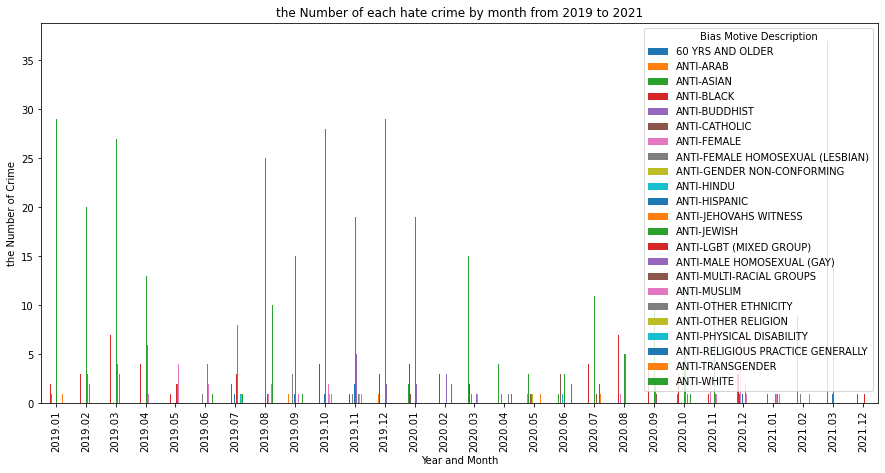

In [1182]:
fig, ax = plt.subplots(figsize=(15,7))
all_crime.unstack().plot(ax=ax, kind = "bar")
ax.set_xlabel("Year and Month")
ax.set_ylabel("the Number of Crime")
ax.set_title("the Number of each hate crime by month from 2019 to 2021")

## 4-1. Data Analysis and visualization (figure 1)
    above bar graph shows the all hate crimes between Jan 2019 and 2021 march.
    Anti-jewish crime is the dominant crime among the all hate crimes.
    to simplify graph, we are going to modify table to see a better result.

    since the information we want is just hate crime related to race. choose race/color category.
    and make a table for only offences related to race.

In [1183]:
option = ["Race/Color"]
racist = df.loc[df["Offense Category"].isin(option)]
racist.sort_values("year_month", ascending= True)
racist = racist.reset_index()
racist = racist[["year_month", "Bias Motive Description"]]
racist["amount"] = ""
racist

,year_month,Bias Motive Description,amount
0,2019.08,ANTI-WHITE,
1,2020.02,ANTI-WHITE,
2,2021.03,ANTI-ASIAN,
3,2021.03,ANTI-ASIAN,
4,2019.05,ANTI-BLACK,
...,...,...,...
202,2019.01,ANTI-BLACK,
203,2020.06,ANTI-WHITE,
204,2019.10,ANTI-BLACK,
205,2020.08,ANTI-BLACK,


    make a table by counting all the felony based on bias motive description and year_month

In [1184]:
count = racist.groupby(["year_month", "Bias Motive Description"]).count()["amount"]
count

year_month  Bias Motive Description 
2019.01     ANTI-ASIAN                   1
            ANTI-BLACK                   2
            ANTI-WHITE                   1
2019.02     ANTI-BLACK                   3
            ANTI-WHITE                   2
2019.03     ANTI-BLACK                   7
            ANTI-WHITE                   8
2019.04     ANTI-BLACK                   4
2019.05     ANTI-BLACK                   1
2019.06     ANTI-BLACK                   4
            ANTI-WHITE                   1
2019.07     ANTI-BLACK                   5
            ANTI-WHITE                   1
2019.08     ANTI-BLACK                   2
            ANTI-MULTI-RACIAL GROUPS     1
            ANTI-WHITE                  10
2019.09     ANTI-BLACK                   1
            ANTI-WHITE                   1
2019.10     ANTI-BLACK                   4
            ANTI-WHITE                   1
2019.11     ANTI-BLACK                   1
            ANTI-WHITE                   3
2019.12     ANTI-

Text(0.5, 1.0, 'the Number of race related hate crime by month from 2019 to 2021')

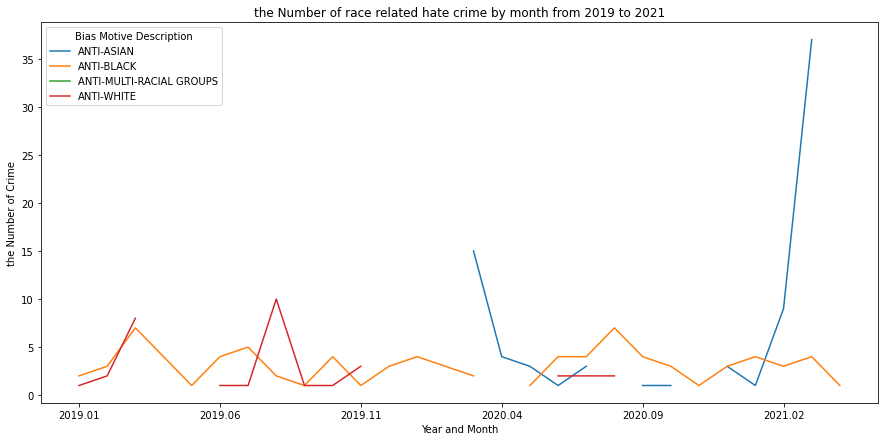

In [1185]:
fig, ax = plt.subplots(figsize=(15,7))
count.unstack().plot(ax=ax)
ax.set_xlabel("Year and Month")
ax.set_ylabel("the Number of Crime")
ax.set_title("the Number of race related hate crime by month from 2019 to 2021")

## 4-2. Data Analysis and visualization (figure 2)
    figure 2 shows the hate crime only related to race.
    we can see Anti-black crimes are happened all around that given period in NYC.
    Anti-asian crime was starts on early 2010 and decreased for a while and then skyrocketted on early 2021
    Anti-white crime happened occasionally but there is no pattern for that.

In [1186]:
# make a table only related to the Anti_asian crime.
# make a group by year and make one more coloum named amount and put the number of crime in that month.
df3 = df.copy()
option2 = ["ANTI-ASIAN"]
asian_hater = df3.loc[df3["Bias Motive Description"].isin(option2)]
asian_hater = asian_hater.sort_values("year_month", ascending= True)
asian_hater = asian_hater.reset_index()
asian_hater["amount"] =""
asian_hater = asian_hater[["year_month","amount"]]
asian_hater = asian_hater.groupby(["year_month"])["year_month"].count().reset_index(name="amount")

In [1187]:
# make a table only related to the Anti_black crime.
# make a group by year and make one more coloum named amount and put the number of crime in that month.
df4 = df.copy()
option3 = ["ANTI-BLACK"]
black_hater = df4.loc[df4["Bias Motive Description"].isin(option3)]
black_hater = black_hater.sort_values("year_month", ascending= True)
black_hater = black_hater.reset_index()
black_hater["amount"] =""
black_hater = black_hater[["year_month","amount"]]
black_hater = black_hater.groupby(["year_month"])["year_month"].count().reset_index(name="amount")
black_hater

,year_month,amount
0,2019.01,2
1,2019.02,3
2,2019.03,7
3,2019.04,4
4,2019.05,1
5,2019.06,4
6,2019.07,5
7,2019.08,2
8,2019.09,1
9,2019.10,4


In [1188]:
X = asian_hater["year_month"]
y = asian_hater["amount"]

In [1189]:
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)


LinearRegression()

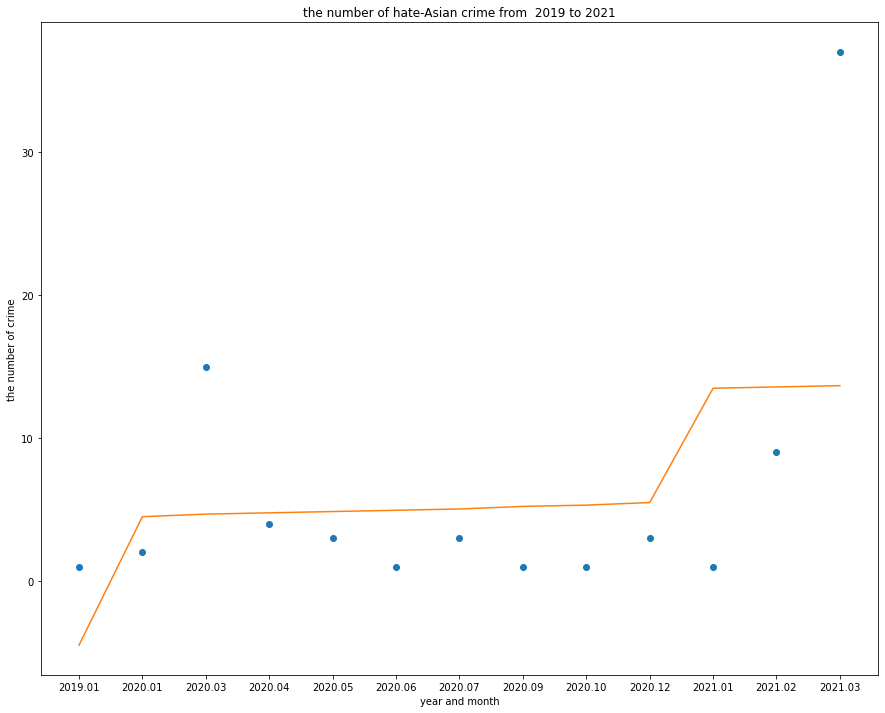

In [1190]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.title("the number of hate-Asian crime from  2019 to 2021")
plt.xlabel("year and month")
plt.ylabel("the number of crime")
plt.show()


## 5-1. Regression line and Machine Learning (figure 3)
    figure 3 shows the number of the Hate-Asian crime in NYC between Jan 2019 and March 2021
    On march 2020, there are steep increasing of the crime but it goes down.
    In 2021 Anti-Asian crime increased again, and on March 2021 the number of crime towards asian came to the top.
    with the regression line, we can predict that the hate-asian crime can be increased.

In [1191]:
X = black_hater["year_month"]
y = black_hater["amount"]

In [1192]:
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression()

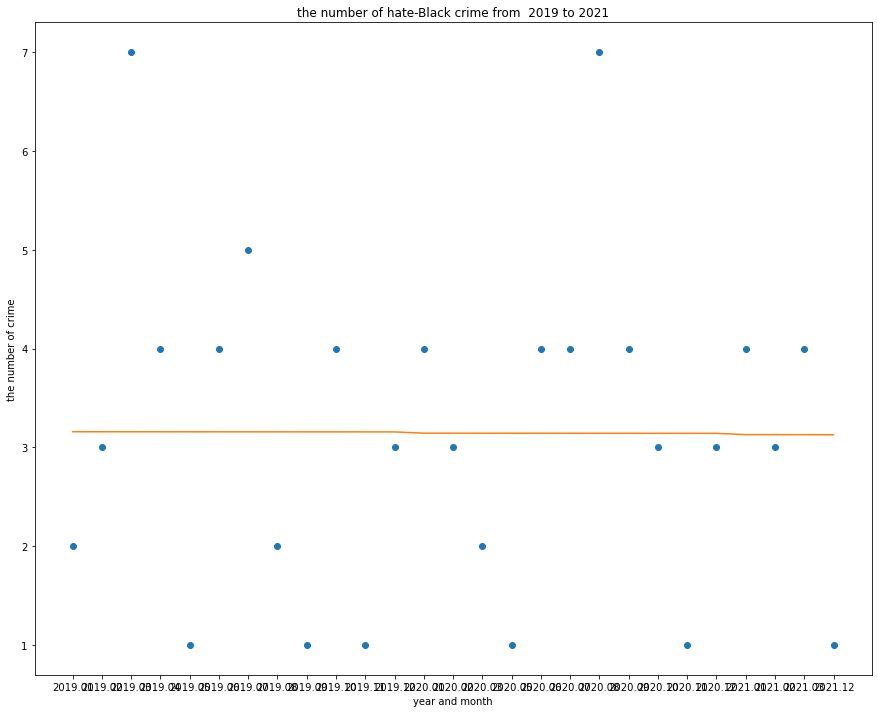

In [1193]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.title("the number of hate-Black crime from  2019 to 2021")
plt.xlabel("year and month")
plt.ylabel("the number of crime")
plt.show()


## 5-2. Regression line and Machine Learning (figure 4)
    figure 4 shows the number of the Hate-Black crime in NYC between Jan 2019 and March 2021
    with the regression line, we can assume that the hate-black crimes were keep steady all over that period.
    Since regression line neither increased nor decreased, we can predict that the crime can be steady in the future.

## 6. Insight Attained
    In this project, we can see the crime pattern in NYC between January 2019 to March 2021.
    In 2019, we can see there is almost no hate crime toward asian in the NYC.
    However, when Covid starts in the US on March 2020 and we can see that the Hate-Asian crime in the NYC increased from that time.
    As I assumed, the Hate crime toward asian has been increased and keep increasing at the moment.

    On the other hand. I expect the "black lives matter" movement should decrease the number of crime toward black people.
    But Anti-Black crime were happened steadly in that given period.
    By those analysis, we can assumed that the BLM movement didnt affact to the actual Anti-black hate crime a lot.

    It seems covid is almost end game. Thanks to the vaccins, CDC announced that we can actually go back to the normal life without the mask.
    Still, however, there are many hate crime commited in the world including US.

    United States of America is born to be melting pot. It was built by the immigrants.
    But unlike others, many asians are still considered as an alien, a foreigner, even we are not the first generation immigrant.
    question like "Where are you REALLY from" is one of the most common question asked to Asian American.
    After covid, it goes viral and it became more violent. "Go back to your country!", "You spead your country's virus"
    was even considered mild since many people even murdered theseday.

    from this project, it was sad that still Asian Crime is increasing, and the big movement like BLM could not decrease the hate crime.
    However, I really hope that people are more and more enlighted for no more hate crime happens in this diverse country. 
